In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [6]:
len(X_train_full)

15480

In [7]:
len(X_test)

5160

In [8]:
len(X_train)

11610

In [9]:
len(X_valid)

3870

In [10]:
## Convert the X_train into Dataframe
import pandas as pd
df_train=pd.DataFrame(X_train,columns=housing.feature_names)

In [11]:
print(df_train.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  3.5214      15.0  3.049945   1.106548      1447.0  1.605993     37.63   
1  5.3275       5.0  6.490060   0.991054      3464.0  3.443340     33.69   
2  3.1000      29.0  7.542373   1.591525      1328.0  2.250847     38.44   
3  7.1736      12.0  6.289003   0.997442      1054.0  2.695652     33.55   
4  2.0549      13.0  5.312457   1.085092      3297.0  2.244384     33.93   

   Longitude  
0    -122.43  
1    -117.39  
2    -122.98  
3    -117.70  
4    -116.93  


In [13]:
## let us standardise the data
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_valid=scalar.fit_transform(X_valid)
X_test=scalar.fit_transform(X_test)

In [14]:
len(X_train)

11610

In [15]:
len(X_test)

5160

In [16]:
len(X_valid)

3870

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]))
#model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(1))


model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=1e-5))
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20


/Users/gopikagupta/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 7.3121 - val_loss: 6.7537
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 7.0312 - val_loss: 6.4858
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.7656 - val_loss: 6.2327
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6.5143 - val_loss: 5.9933
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.2763 - val_loss: 5.7667
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0506 - val_loss: 5.5520
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.8365 - val_loss: 5.3483
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.6331 - val_loss: 5.1550
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.4398 - val_loss: 4.9714
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.2560 - val_loss: 4.7970
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.0811 - val_loss: 4.6312
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.

Text(0.5, 1.0, 'training and Validation loss')

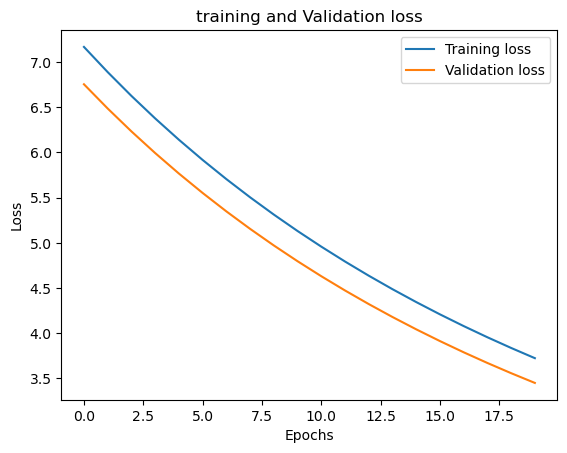

In [29]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('training and Validation loss') ## ideally itshould be very closeto each other

In [30]:
model.evaluate(X_test,y_test)  ### make this as high as possible

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.5794


3.615727663040161

In [31]:
X_new=X_test[:3]
y_pred=model.predict(X_new)


for i in range(len(X_new)):
    print(f'Sample{i+1}:')
    print(f'Predicted:{y_pred[i][0]}')
    print(f'Actual:{y_test[i]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Sample1:
Predicted:0.392265647649765
Actual:0.477
Sample2:
Predicted:0.5348535776138306
Actual:0.458
Sample3:
Predicted:0.9378725290298462
Actual:5.00001
